<a href="https://colab.research.google.com/github/mathiasadikpon/AI/blob/main/Final_Project_CMP_414.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Choice 2: Classification on the Telco-Churn Dataset

1. Visualize the univariate distribution of each input variable and the target variable “churn”.

Univariate analysis looks at one feature at a time. when we analyse a feature independently, we are usually interested of its values and ignore other features in the dataset.

In [ ]:
import numpy as np  # scientific computation
import pandas as pd  # data handling
import matplotlib.pyplot as plt  # plotting
# The following "magic command" allows figures to be displayed automatically in notebook
%matplotlib inline

In [ ]:
# load data
dataset = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", sep=',' )
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Preprocessing

In [ ]:
# Show the size of the data set
dataset.shape

(7043, 21)

In [ ]:
# Show the data type of each column
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Are there any missing values?
# If so, how should we handle them?
dataset.isnull().sum().sort_values(ascending=False)

Churn               0
OnlineSecurity      0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineBackup        0
TotalCharges        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
customerID          0
dtype: int64

In [ ]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
dataset["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

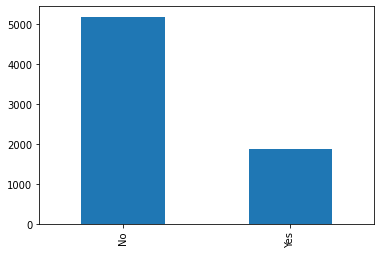

In [ ]:
dataset['Churn'].value_counts().plot.bar()

In [ ]:
dataset['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

2.       Split data into training and test sets. Convert each categorical variable into numerical variables using one-hot-encoding.

In [ ]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
interger_encoded = enc.fit(dataset)
datat1 = dataset.drop(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges'], axis = 1)
datat1_encoding = pd.get_dummies(datat1, sparse= True)

In [ ]:
datat1_encoding.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


In [ ]:
# Split data into training and test sets.
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(datat1_encoding, test_size=0.4)
print("Train set:", df_train.shape)
print("Test set:", df_test.shape)

Train set: (4225, 44)
Test set: (2818, 44)


3.  Evaluate the following classification models:

a.      Logistic Regression

In [ ]:
df_train.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
6438,1,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
6450,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0
5601,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,0
1031,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0
5694,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


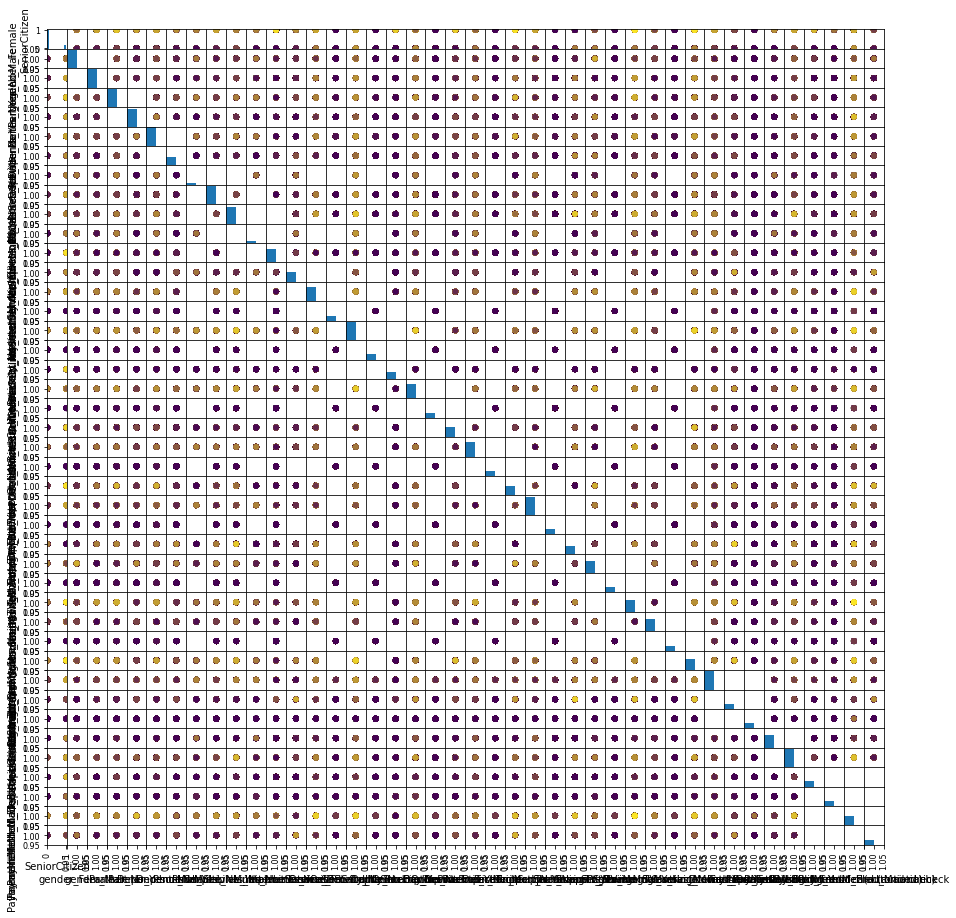

In [ ]:
scatter_matrix(df_train.iloc[:, :42], figsize=(15, 15), marker='o',
               c=df_train['Churn_Yes'])
plt.show()

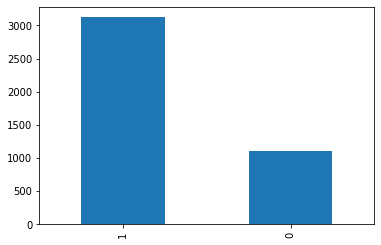

In [ ]:
df_train['Churn_No'].value_counts().plot.bar()

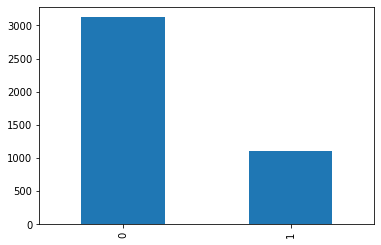

In [ ]:
df_train['Churn_Yes'].value_counts().plot.bar()

In [ ]:
# Build the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
input_cols = df_train.columns[:42]
model.fit(df_train[input_cols], df_train['Churn_Yes'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# softmax function is used in multi-class logistic regression to guarantee:
# 1. all probabilities are numbers between 0 and 1.
# 2. the probabilities sum up to 1.

# The policy is to predict the record to be the class with the highest probability.

# Calculate the training accuracy score.
from sklearn.metrics import accuracy_score
test_predictions = model.predict(df_test[input_cols])
accuracyL = accuracy_score(df_test['Churn_Yes'], test_predictions)
print(accuracyL)

0.7789212207239177


In [ ]:

# precision - recall - f1 score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(df_test['Churn_Yes'], test_predictions) # How much Churn_Yes iris are correctly identified?
recall = recall_score(df_test['Churn_Yes'], test_predictions) # How much Churn_Yes predictions are correct?
f1 = f1_score(df_test['Churn_Yes'], test_predictions)
print('Precision: ', precision) # How much Churn_Yes are correctly identified?
print("Recall: ", recall) # # How much Churn_Yes predictions are correct?
print('F-1 score: ', f1)

Precision:  0.6023102310231023
Recall:  0.4886211512717537
F-1 score:  0.5395417590539542


In [ ]:
print('The recall is very low')

The recall is very low


b.     Support Vector Machine

In [ ]:
#Support vector machine is not applicable for this model

c.K Nearest Neighbors

In [ ]:

# kNN model
from sklearn.neighbors import KNeighborsClassifier
model_2nn = KNeighborsClassifier(n_neighbors=2)
model_2nn.fit(df_train[input_cols], df_train['Churn_Yes'])

model_3nn = KNeighborsClassifier(n_neighbors=3)
model_3nn.fit(df_train[input_cols], df_train['Churn_Yes'])

model_4nn = KNeighborsClassifier(n_neighbors=4)
model_4nn.fit(df_train[input_cols], df_train['Churn_Yes'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
plot_data = pd.DataFrame()
plot_data = df_train
test_data = df_test
test_data['prediction2'] = model_2nn.predict(test_data[input_cols])
test_data['prediction3'] = model_3nn.predict(test_data[input_cols])
test_data['prediction4'] = model_4nn.predict(test_data[input_cols])
test_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,prediction2,prediction3,prediction4
1378,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
3245,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
886,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,1,1
6255,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0
6116,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0


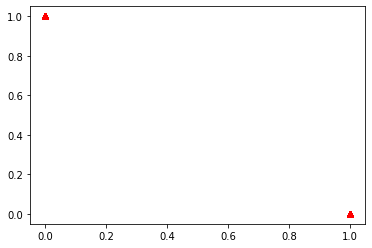

In [ ]:
# 3. plot these points: points classified as 0 should be visualized as blue points,
#   points classified as 1 should be visualized as red points.
blue_pts = datat1_encoding[datat1_encoding['Churn_Yes'] == 0]
red_pts = datat1_encoding[datat1_encoding['Churn_Yes'] == 1]
test_data_blue = test_data[test_data['prediction4'] == 0]
test_data_red = test_data[test_data['prediction4'] == 1]
plt.plot(test_data_blue['gender_Female'], test_data_blue['gender_Male'], 'b.', alpha=0.1)
plt.plot(test_data_red['gender_Female'], test_data_red['gender_Male'], 'r.', alpha=0.1)
plt.plot(blue_pts['gender_Female'], blue_pts['gender_Male'], 'b^', label='y = 0')
plt.plot(red_pts['gender_Female'], red_pts['gender_Male'], 'r^', label='y = 1')

In [ ]:
# Calculate the accuracy score on the test set.
# accuracy_score()
print('The accuracy score when K = 2 is :', accuracy_score(test_data['Churn_Yes'], test_data['prediction2']))
print('The accuracy score when K = 3 is :', accuracy_score(test_data['Churn_Yes'], test_data['prediction3']))
print('The accuracy score when K = 4 is :', accuracy_score(test_data['Churn_Yes'], test_data['prediction4']))

The accuracy score when K = 2 is : 0.7437899219304471
The accuracy score when K = 3 is : 0.7402413058907026
The accuracy score when K = 4 is : 0.7540809084457062


In [ ]:
acK =  accuracy_score(test_data['Churn_Yes'], test_data['prediction4'])
print('The best choice of K  is 4 since it has higest accuracy score')

The best choice of K  is 4 since it has higest accuracy score


d.       Decision Trees

In [ ]:
# Build a decision tree
from sklearn.tree import DecisionTreeClassifier
X = df_train.loc[:, input_cols]
y = df_train['Churn_Yes']
tree_clf2 = DecisionTreeClassifier(max_depth=2,
                                  random_state=42)
tree_clf2.fit(X, y)

tree_clf3 = DecisionTreeClassifier(max_depth=3,
                                  random_state=42)
tree_clf3.fit(X, y)

tree_clf4 = DecisionTreeClassifier(max_depth=4,
                                  random_state=42)
tree_clf4.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

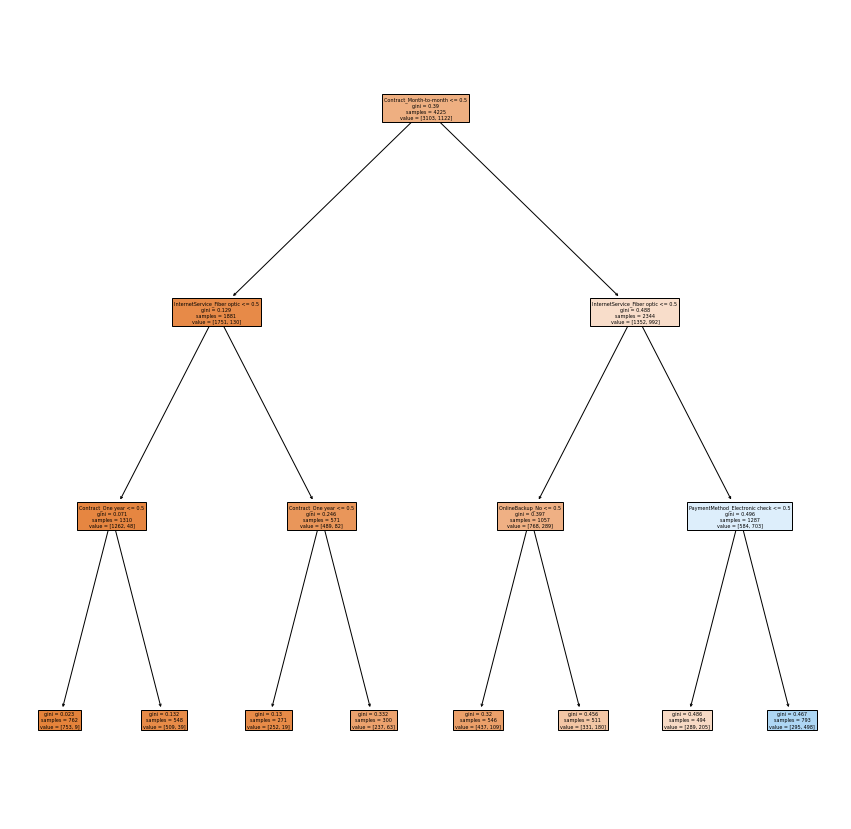

In [ ]:

# Visualize the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(tree_clf3, feature_names=X.columns, filled=True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
score_dict = dict()
prediction2= tree_clf2.predict(df_test[input_cols])
score_dict[2] = accuracy_score(df_test['Churn_Yes'], prediction2)
print("Accuracy score for max_depth = 2 is :", score_dict[2])

prediction3= tree_clf3.predict(df_test[input_cols])
score_dict[3] = accuracy_score(df_test['Churn_Yes'], prediction3)
print("Accuracy score for max_depth = 3 is :", score_dict[3])

prediction4= tree_clf4.predict(df_test[input_cols])
score_dict[4] = accuracy_score(df_test['Churn_Yes'], prediction4)
print("Accuracy score for max_depth = 4 is :", score_dict[4])

Accuracy score for max_depth = 2 is : 0.7622427253371186
Accuracy score for max_depth = 3 is : 0.7590489709013485
Accuracy score for max_depth = 4 is : 0.7572746628814763


In [ ]:
acT = score_dict[2]
# with the max_depth egal to 2, the accuracy score is the highest, therefore, the best max_depth is 2

e. Random Forests

In [ ]:
# Build a random forest model with the same max_depth value and n_estimators=100
from sklearn.ensemble import RandomForestClassifier
X = df_train.loc[:, input_cols]
y = df_train['Churn_Yes']

In [ ]:
#max_depth = 2
rf_clf_2 = RandomForestClassifier(
    n_estimators=100,
    max_depth=2,
    n_jobs=-1
)
rf_clf_2.fit(X, y)

#max_depth = 3
rf_clf_3 = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    n_jobs=-1
)
rf_clf_3.fit(X, y)

#max_depth = 4
rf_clf_4 = RandomForestClassifier(
    n_estimators=100,
    max_depth=4,
    n_jobs=-1
)
rf_clf_4.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf,
                           X,
                           y,
                           axes=[0, 7.5, 0, 3]):
    
    # Create a grid of points
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    # Use numpy.ravel() to flatten x1 and x2
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    # Use classifier to obtain predictions on X_new 
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    # Pick three colors representing classes
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    
    # Use contourf() to draw classification areas
    plt.contourf(x1,
                 x2,
                 y_pred,
                 alpha=0.3,
                 cmap=custom_cmap)

In [ ]:
# Show the accuracy score on the test set

from sklearn.metrics import accuracy_score
prediction2= rf_clf_2.predict(df_test[input_cols])
prediction3= rf_clf_3.predict(df_test[input_cols])
prediction4 = rf_clf_4.predict(df_test[input_cols])


print("Accuracy score for random forest model with  max_depth = 2 is :", accuracy_score(df_test['Churn_Yes'], prediction2))
print("Accuracy score for random forest model with  max_depth = 3 is :", accuracy_score(df_test['Churn_Yes'], prediction3))
print("Accuracy score for random forest model with  max_depth = 4 is :", accuracy_score(df_test['Churn_Yes'], prediction4))


Accuracy score for random forest model with  max_depth = 2 is : 0.7349183818310859
Accuracy score for random forest model with  max_depth = 3 is : 0.7668559261887864
Accuracy score for random forest model with  max_depth = 4 is : 0.7682753726046841


In [ ]:
acR = accuracy_score(df_test['Churn_Yes'], prediction4)
# with the max_depth egal to 4, the accuracy score is the highest, therefore, the best max_depth is 4

4.       Choose the best model by analyzing the accuracy, precision, recall, and F-1 score.

In [ ]:
print('The recall of logistic regression is: ', recall)
print('The precision of logistic regression is: ', precision)
print('The F_1 score of logistic regression is: ', f1)
print('The accuracy of logistic regression is: ', accuracyL)
print('The accuracy of K Nearest Neighbors is: ', acK)
print('The accuracy of Decision Tree is: ', acT)
print('The accuracy of Random Forest is: ', acR)

The recall of logistic regression is:  0.4886211512717537
The precision of logistic regression is:  0.6023102310231023
The F_1 score of logistic regression is:  0.5395417590539542
The accuracy of logistic regression is:  0.7789212207239177
The accuracy of K Nearest Neighbors is:  0.7540809084457062
The accuracy of Decision Tree is:  0.7622427253371186
The accuracy of Random Forest is:  0.7682753726046841


In [ ]:
print('The best model for this model is Random Forest since it has the highest accuracy')

The best model for this model is Random Forest since it has the highest accuracy


5.       Which types of customers are less likely to end the service? 

consider the Decision tree model. We see from the tree that customers who are less likely to end the service are customers for international service  of DSL less than 0.5and who have PaymentMethod of Electronic check